# Simulation dynamischer Systeme
Author: Marcel Szalbach

## Imports 
Benötigte Imports und Einstellungen von matplotlib damit die Graphen im Notebook dargestellt werden.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Aufgabenbeschreibung
Es soll ein Glastubus-basiertes Heizungssystem simuliert werden.  Dieses besteht aus einer Quarzglasröhre. Mit Hilfe einer Heizspirale wird Wärme von außen eingebracht.  Der Tubus verliert Wärme an seine Umgebung. Skizze 1 zeigt den Aufbau solch eines Systems.

![Glastubus](Skizze1.png  "Glastubus" )

## Mathematische Model
Das System lässt sich wie folgt mathematisch beschreiben: 
$$ m \cdot c_p {\frac {dT}{dt}} = Q $$
$$ Q = q_{in} - q_{out} $$
$$ q_{in} = q $$
$$ q_{out} = h_s \cdot A_s(T(t)-T_a)$$

$m$ ist die Masse des Glastubus, $c_p$ ist die Wärmekapzität des Glases, $A_s$ ist die Oberfläche des Glastubus, $h_s$ ist der Wärmeübergangskoeffizient zur Umgebung und $T_a$ ist the Raumtemperatur.
Die Differentialgleichung zur Bestimmung des Temperaturverlaufs ist:

gespeicherte Energie = zugeführte Energie - abgeführte Energie

$$ m \cdot c_p {\frac {dT}{dt}} = q_{in} - h_s \cdot A_s \cdot (T(t)-T_a) $$

Das System hat die Form :
$$a \cdot {\dot{T}}(t) + b \cdot T(t)=C$$

Somit kann man die Differentialgleichung mit Hilfe der Partikulären Lösung lösen und erhält folgende Gleichung die den Temperaturverlauf des Glastubus beschreibt:
$$T(t) = T_a  + {\frac{q_{in}}{h_s \cdot A_s}} \cdot (1-e^{-t \cdot \frac{h_s \cdot A_s}{m \cdot c_p}})$$

Nur wenn die Raumtemperatur 0° C ist kann man für dieses System die Übergangsfunktion bilden.

## System Konstanten
Geben sind folgende Werte die den Glastubus beschreiben:

In [2]:
innen_radius=0.1 #m
dicke=0.01 #m
aussen_radius=0.2 #m
laenge=1 #m
dichte=2500 #kg/m³
cp=1078 # J/kg K
hs=5 #W/m² K
Ta=20 #°C

Zum Berechnen werden noch benötigt die Masse $m$ und die Oberfläsche $A_s$ des Glastubus. Die Oberfälsche eines Zylinders ist gegeben mit:
$$O = 2 \cdot \pi \cdot r² + 2 \cdot \pi \cdot r \cdot h $$

In [3]:
As=2*np.pi*aussen_radius**2+2*np.pi*aussen_radius*laenge #m²
print("As = "+str(As)+" m²")

As = 1.5079644737231006 m²


Die Masse des Glastubus kann berechnet werden aus der Differenz der Volumen vom äusseren Zylinder und dem inneren Zylinder.
$$V=pi*r²*h$$

In [4]:
V_aussen=np.pi*aussen_radius*laenge #m³
V_innen=np.pi*innen_radius*(laenge-dicke) #m³
V_glastubus=V_aussen-V_innen #m³
print("V_glastubus = "+str(V_glastubus)+" m³")
m=V_glastubus*dichte #kg
print("m = "+str(m)+" kg")

V_glastubus = 0.31730085801256913 m³
m = 793.2521450314229 kg


## Hilffunktion

In [5]:
def plot(t,qin,heater):
    """
    Zeichnet den Plot vom Eingangssignal und dem System heater in zwei Subplots.
    
    Args:
        t     : Die Zeitpunkte auf der X-Achse. Muss selbe Dimension haben wie qin und heater.
        qin   : Die Energie zu den Zeitpunkten t.
        heater: Ausgabe des Heater-Systems zu den Zeitpunkten t mit der zugeführten Energie qin.
    """
    plt.figure(figsize=(10,10))
    #Abstand zwischen Subplots
    plt.subplots_adjust(hspace=.5)
    plt.subplot(211)
    plt.title("Eingangssignal")
    plt.ylabel('Leistung in kW')
    plt.xlabel("Zeit in s")
    plt.plot(t,qin)
    #Skalierung der y-Achse damit das Eingangssignal besser dargestellt wird
    plt.ylim(plt.ylim()[0]*0.9,plt.ylim()[1]*1.1)
    
    plt.subplot(212)
    plt.title("System")
    plt.ylabel('Temperatur in °C')
    plt.xlabel("Zeit in s")
    plt.plot(t,heater)
    plt.show()

## Modelfunktion
Die Funktion heater(*) berechnet die Temperatur T zu einem Zeitpunkt t mit dem im vorherigen Kapitel gebenen Konstanten für den Glastubus.

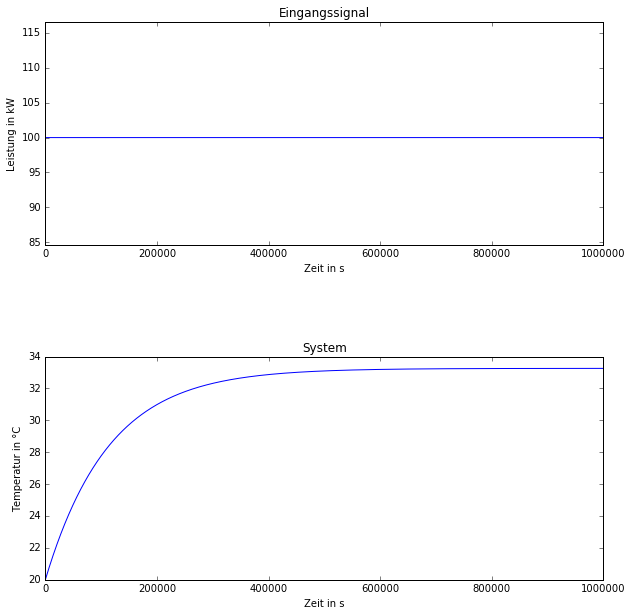

In [6]:
def heater(Ta,hs,As,cp,m,t,qin):
    """
    Berechnet die Temperatur für einen gebenen Zeitpunkt und die zugeführte Energie.
    
    Args:
        Ta : Raumteperatur zum Zeitpunkt t
        hs : Wärmeübergangskoeffizient
        As : Oberfläche
        cp : Wärmekapzität
        m  : Masse
        t  : Zeit
        qin: Eingangsenergie
    """
    return Ta+(qin/(hs*As))*(1-np.e**(-t*(hs*As/(m*cp))))

t=np.arange(0,1000000,1)
qin=np.full(t.size, 100,np.double) #Konstante 100 W für alle Zeitpunkte t

plot(t,qin,heater(Ta,hs,As,cp,m,t,qin))

## Reaktion des Systems auf verschiedene Eingangssignale

### Sinus

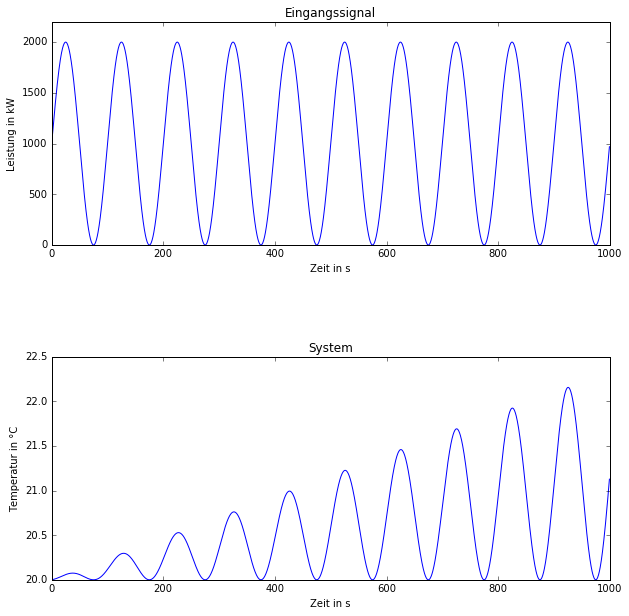

In [7]:
f=0.01 # Hz
u=1000 #W
t=np.arange(0,1000,0.5)

def sinus(u,f,t):
    #nur positiver Sinus damit keien negative Energie anliegt
    return u*np.sin(2*np.pi*f*t)+u

qin=sinus(u,f,t)
plot(t,qin,heater(Ta,hs,As,cp,m,t,qin))

### Sprungfunktion

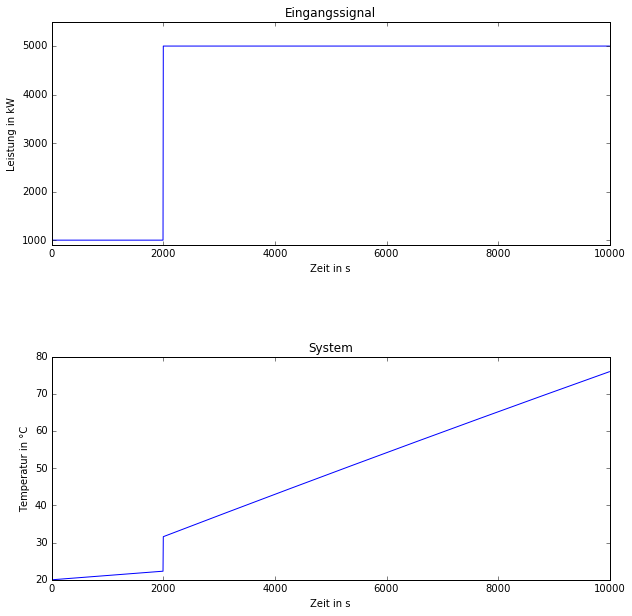

In [8]:
u_start=1000 #W
u_ende=5000 #W
t_sprung=2000
t=np.arange(0,10000,5)

def sprungfunktion(u_start,u_ende,t_sprung,t):
    if(t<t_sprung):
        return u_start
    else:
        return u_ende

vector_sprungfunktion=np.vectorize(sprungfunktion)
qin=vector_sprungfunktion(u_start,u_ende,t_sprung,t)

plot(t,qin,heater(Ta,hs,As,cp,m,t,qin))

### Konstantes Signal mit Rauschen

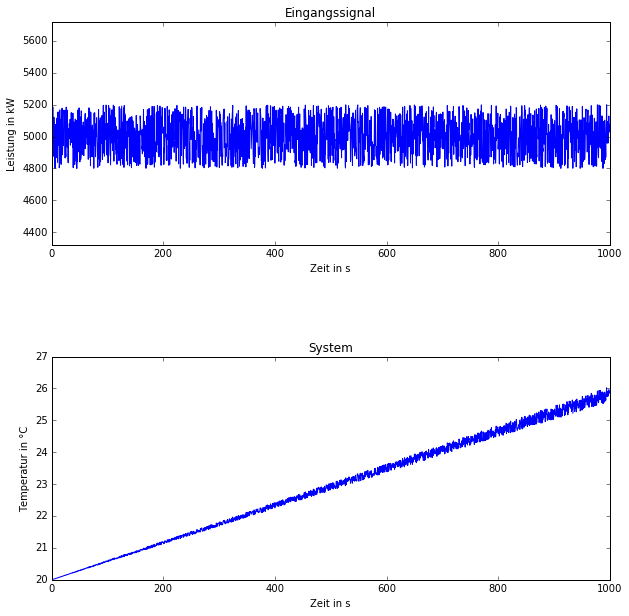

In [9]:
u=5000 #W
noise=200 #W
t=np.arange(0,1000,0.5)

def konstant_rauschen(u,noise,t):
    return u+np.random.uniform(-noise,noise,t.size) 

qin=konstant_rauschen(u,noise,t)

plot(t,qin,heater(Ta,hs,As,cp,m,t,qin))

## Bewertung der Ergebnisse
Bei gleichbleibender zugeführten Energie erwärmt sich der Glastubus bis es einen Gleichgewichtszustand zwischen Wärmeabgabe und -zufuhr einstelt und die Temperatur ab diesem Zeitpunkt konstant bleibt. Dies zeigt der Graph im Kapitel [Modelfunktion](#Modelfunktion). Sobald mehr Energie zugeführt wird steigt auch die Geschwindigkeit der Temeraptur zunahme im System. Ebenfalls reagiert das System direkt auf mehr Energie. Es gibt also keine Totzeit. Dies wird gezeigt im Kapitel [Sprungfunktion](#Sprungfunktion). Aber das System ist anfällig gegen Störungen. Die Temerapturschwankungen werden stärker umso wärmer das System wird bei gleichbleibendem Rauschen auf dem Eingangssignal siehe Kapitel [Konstantes Signal mit Rauschen](#Konstantes-Signal-mit-Rauschen).


## Benutze Module und ihre Version

In [10]:
modules = ["numpy","scipy","matplotlib"]

for name in sorted(modules): 
    module_name = __import__ (name)
    version = getattr(module_name, '__version__')
    print(name + " : " + str(version))

matplotlib : 1.5.0
numpy : 1.10.2
scipy : 0.16.1
